SIMULATING AN ORBITAL SYSTEM


1.   Brute Force


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import pandas as pd

Initialization of Simulation Parameters



In [41]:
t0 = 0
dt = 86400;
tf = 86400* 365 * 10
G = 6.67e-11

t = np.arange(0,tf+dt, dt)
r = np.zeros((len(t),3,9))
v = np.zeros((len(t),3,9))
m = np.array([1.989*10**6,0.33011,4.867,5.97,0.64,1898,568.34,86.81,102.41])*10**24
r[0,0,:]=np.array([0,57.9,108.21,149.59,227.92,778.57,1453.53,2872.46,4495.06])*10**9
v[0,1,:]=np.array([0,47.36,35.02,29.78,24.07,13,9.68,6.8,5.43])*10**3

Propagation

In [55]:
for i in range(len(t)-1):#Time-Frame
  for j in range(4):# 4 = No. of Planets
    a = np.zeros(3) # acceleration vector
    for k in range(4):
      if k!= j:
        R = np.linalg.norm(r[i,:,j])
        Rmag = np.linalg.norm(r[i,:,j]-r[i,:,k])
        a[:] += -((G*m[k])/(Rmag)**2)* (r[i,:,j]-r[i,:,k])/(Rmag)
    v[i+1,:,j] = v[i,:,j] + a[:]*dt
    r[i+1,:,j] = r[i,:,j] + v[i,:,j]*dt

Plotting

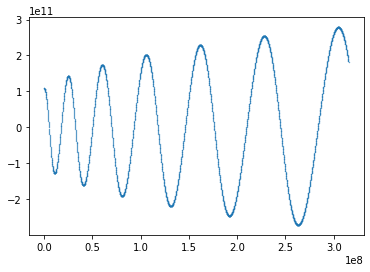

In [58]:
plt.scatter(t,r[:,0,2],s=0.1)
plt.show()  


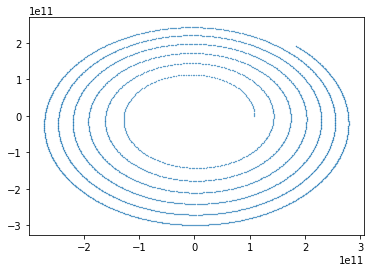

In [59]:
plt.scatter(r[:,0,2],r[:,1,2],s=0.1)
